Reads a csv file of futures and spreads bid/ask prices
Constructs a graph
Checks all pairs path

In [34]:
import pandas as pd
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
df = pd.read_csv(r'c:\temp\ho_prices_sorted.csv')

In [35]:

graph = {}
start_nodes = []
def add_node(node:str):
    global graph
    if node not in graph:
        graph[node] = []

def add_edge(start_node:str, end_node:str):
    add_node(start_node)
    add_node(end_node)
    if end_node not in graph[start_node]:
        graph[start_node].append(end_node)
    if start_node not in graph[end_node]:
        graph[end_node].append(start_node)

# loop through the rows and build a graph (do not worry about bid/ask
for idx, row in df.iterrows():
    instr = row['instr']
    bid = row['bid']
    ask = row['ask']
    if '-' in instr:
        parts = instr.split('-')
        add_edge(parts[0],parts[1])
    else:
        start_nodes.append(instr)
        add_node(instr)
        

        


In [36]:
g = nx.DiGraph()
g.add_nodes_from(graph.keys())
for k,v in graph.items():
    g.add_edges_from([(k,t) for t in v])
    

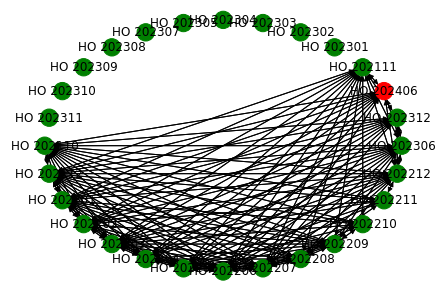

In [38]:
colors  = ['green' if node in start_nodes else 'red' for node in g.nodes()]
# plt.figure(figsize=(10, 8))
nx.draw_shell(g, with_labels=True, node_color=colors)
# plt.show()
plt.savefig(r'c:\temp\ho.png', format='PNG')

In [15]:
res = nx.multi_source_dijkstra_path(g, start_nodes, cutoff=None, weight='weight')
print(res)

{'RB 202110': ['RB 202110'], 'RB 202111': ['RB 202111'], 'RB 202112': ['RB 202112'], 'RB 202201': ['RB 202201'], 'RB 202202': ['RB 202202'], 'RB 202203': ['RB 202203'], 'RB 202204': ['RB 202204'], 'RB 202205': ['RB 202205'], 'RB 202206': ['RB 202206'], 'RB 202207': ['RB 202207'], 'RB 202208': ['RB 202208'], 'RB 202209': ['RB 202209'], 'RB 202210': ['RB 202210'], 'RB 202211': ['RB 202211'], 'RB 202212': ['RB 202212'], 'RB 202301': ['RB 202301'], 'RB 202302': ['RB 202302'], 'RB 202303': ['RB 202303'], 'RB 202304': ['RB 202304'], 'RB 202305': ['RB 202305'], 'RB 202306': ['RB 202306'], 'RB 202312': ['RB 202312']}


In [14]:
res = nx.all_pairs_shortest_path(g)
for r in res:
    print(r)

('RB 202110', {'RB 202110': ['RB 202110'], 'RB 202111': ['RB 202110', 'RB 202111'], 'RB 202112': ['RB 202110', 'RB 202112'], 'RB 202201': ['RB 202110', 'RB 202201'], 'RB 202202': ['RB 202110', 'RB 202202'], 'RB 202203': ['RB 202110', 'RB 202203'], 'RB 202204': ['RB 202110', 'RB 202204'], 'RB 202205': ['RB 202110', 'RB 202205'], 'RB 202206': ['RB 202110', 'RB 202206'], 'RB 202207': ['RB 202110', 'RB 202207'], 'RB 202208': ['RB 202110', 'RB 202208'], 'RB 202209': ['RB 202110', 'RB 202209'], 'RB 202210': ['RB 202110', 'RB 202210'], 'RB 202211': ['RB 202110', 'RB 202211'], 'RB 202212': ['RB 202110', 'RB 202212'], 'RB 202306': ['RB 202110', 'RB 202306'], 'RB 202312': ['RB 202110', 'RB 202312']})
('RB 202111', {'RB 202111': ['RB 202111'], 'RB 202110': ['RB 202111', 'RB 202110'], 'RB 202112': ['RB 202111', 'RB 202112'], 'RB 202201': ['RB 202111', 'RB 202201'], 'RB 202202': ['RB 202111', 'RB 202202'], 'RB 202203': ['RB 202111', 'RB 202203'], 'RB 202204': ['RB 202111', 'RB 202204'], 'RB 202205'

In [33]:
with open(r'c:\temp\all_pairs_shortest_ho.json','w') as f:
    for source in start_nodes:
        res = nx.single_source_bellman_ford_path(g, source)
        f.writelines(str(res))
        f.write('\n')
